In [2]:
using LsqFit, DelimitedFiles, PyPlot

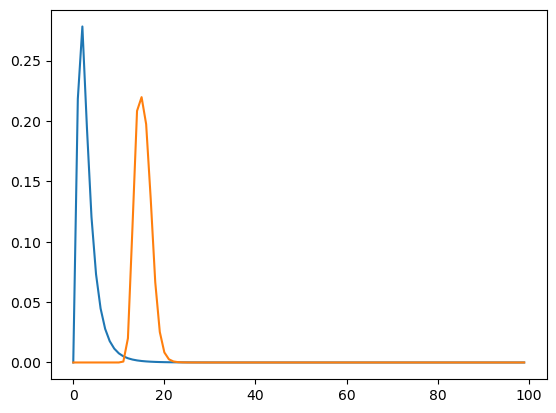

In [8]:
τ_E_to_I = readdlm("tau_E_to_I.txt")
τ_I_to_R = readdlm("tau_I_to_R.txt");
plot(τ_E_to_I,label = "E->I");
plot(τ_I_to_R,label = "I->R");

$$ f(t) = p_0\exp(- \frac{(x-p_1)^2}{p_2})) $$

In [34]:
@. model(x, p) = p[1]*exp( -(x-p[2])^2/p[3])

#fit E->I
T = 50
p0 = [0.5, 5.0,2.]
fit_E_to_I = curve_fit(model,1:T,τ_E_to_I[1:T],p0)
println("E-I, params ", fit_E_to_I.param)
#fit I->R
p0 = [0.2, 10.0,2.]
fit_I_to_R = curve_fit(model,1:T,τ_I_to_R[1:T],p0)
println("I-R, params ", fit_I_to_R.param)


E-I, params [0.27123194964128, 3.2321477096812763, 3.5588801533703016]
I-R, params [0.23226309375518134, 16.149225323240785, 5.995361054231202]


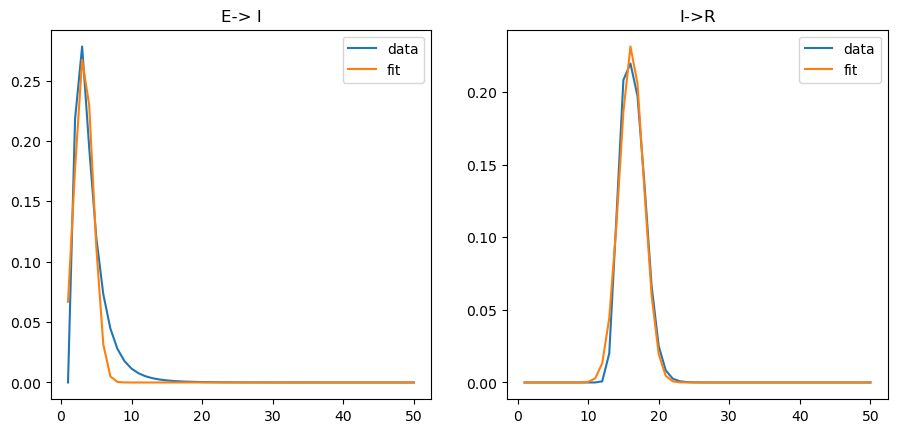

PyObject <matplotlib.legend.Legend object at 0x7f9ce1e62ed0>

In [35]:
#plot fitted curves
fig, axs = subplots(1,2,figsize = (5.4*2,4.8))
x = 1:T
axs[1].plot(x,τ_E_to_I[1:T],label = "data");
axs[1].plot(x,fit_E_to_I.param[1]*exp.(- (x .- fit_E_to_I.param[2]).^2/fit_E_to_I.param[3]),label = "fit");
axs[1].set_title("E-> I")
axs[1].legend()


axs[2].plot(1:T,τ_I_to_R[1:T],label = "data");
axs[2].plot(x,fit_I_to_R.param[1]*exp.(- (x .- fit_I_to_R.param[2]).^2/fit_I_to_R.param[3]),label = "fit");
axs[2].set_title("I->R")
axs[2].legend()